In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#recep2


## Reading Date

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

last_new_job: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

In [2]:
df=pd.read_csv("aug_train.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

I will find how many percentage null values corresponds of total rows? 

In [6]:
def null_sorted(df):
    percented=((df.isnull().sum()*100)/len(df)).sort_values(ascending=False)
    for i in range(len(percented)):
        if percented[i]>0:
            print("{}:{:.2f}%".format(percented.index[i],percented.iloc[i]))
    

In [7]:
null_sorted(df)


company_type:32.05%
company_size:30.99%
gender:23.53%
major_discipline:14.68%
education_level:2.40%
last_new_job:2.21%
enrolled_university:2.01%
experience:0.34%


# Data Cleaning- Data Reshaping


In [8]:
df.duplicated().any()

False

In [9]:
df["company_type"].value_counts()

company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64

In [10]:
df[["company_size","company_type"]]

,company_size,company_type
0,NaN,NaN
1,50-99,Pvt Ltd
2,NaN,NaN
3,NaN,Pvt Ltd
4,50-99,Funded Startup
...,...,...
19153,NaN,NaN
19154,NaN,NaN
19155,50-99,Pvt Ltd
19156,500-999,Pvt Ltd


There is only a column that may provide a clue to fill na values, "company_size". Hence, I will initially regulate categorical values.

In [11]:
df["company_size"].value_counts()

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

In [12]:
map={"<10":"0-9","50-99":"50-99","10/49":"10-49","100-500":"100-500","10000+":"10000+","1000-4999":"1000-4999",
     "500-999":"500-999","5000-9999":"5000-9999"}
df["company_size"]=df["company_size"].map(map)

Now, I will drop rows which include na values for both columns.

In [13]:
df[["company_type","company_size"]]

,company_type,company_size
0,NaN,NaN
1,Pvt Ltd,50-99
2,NaN,NaN
3,Pvt Ltd,NaN
4,Funded Startup,50-99
...,...,...
19153,NaN,NaN
19154,NaN,NaN
19155,Pvt Ltd,50-99
19156,Pvt Ltd,500-999


In [14]:
df=df.dropna(subset=["company_type","company_size"],how="all")
null_sorted(df)

gender:22.00%
major_discipline:9.13%
company_type:5.65%
company_size:4.19%
last_new_job:1.67%
education_level:1.32%
enrolled_university:1.22%
experience:0.33%


In [15]:
pivot_table = pd.pivot_table(df, index='company_size', columns='company_type', aggfunc=np.count_nonzero)['city']
pivot_table

company_type,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
company_size,,,,,,
0-9,286.0,144.0,36.0,14.0,35.0,728.0
10-49,176.0,193.0,32.0,12.0,43.0,910.0
100-500,27.0,214.0,174.0,20.0,151.0,1833.0
1000-4999,NaN,NaN,73.0,15.0,165.0,1016.0
10000+,NaN,NaN,37.0,16.0,150.0,1739.0
50-99,109.0,390.0,77.0,18.0,116.0,2151.0
500-999,2.0,54.0,37.0,11.0,87.0,622.0
5000-9999,NaN,NaN,29.0,7.0,79.0,412.0


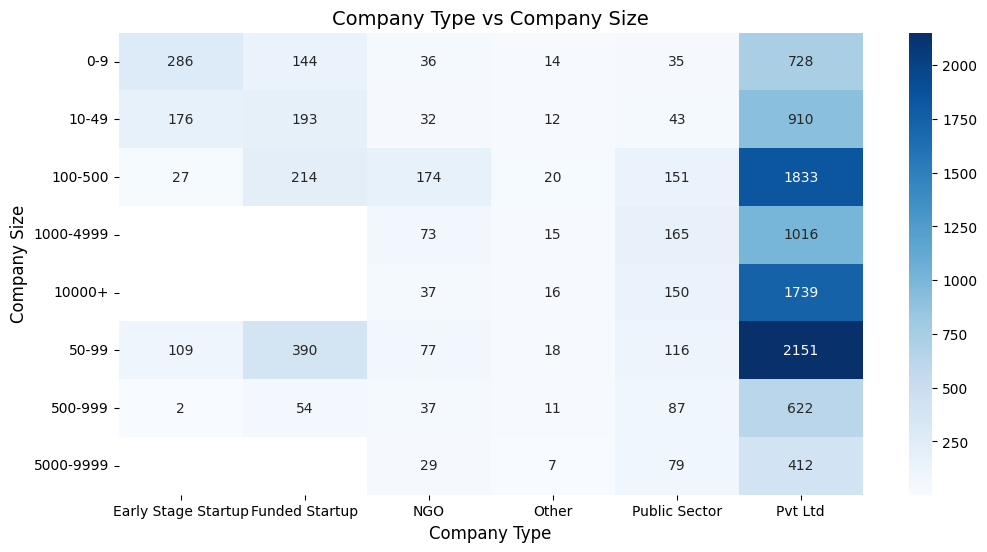

In [16]:

pivot_table = pd.pivot_table(df, index='company_size', columns='company_type', aggfunc=np.count_nonzero)['city']
fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(pivot_table, annot=True,cmap="Blues", ax=ax,fmt='g',)

ax.set_title('Company Type vs Company Size', fontsize=14)
ax.set_xlabel('Company Type', fontsize=12)
ax.set_ylabel('Company Size', fontsize=12)

plt.show()


This heating graph shows better results to determine which company types corresponds the which company size. However, it does not give accurate values. For instance, "50-999"  company size is a part of pvt ltd with 2151 values, while 10000+ company size gives similar results. Hence, I will try to reduce number of categorical values of company size. 

In [17]:
df["company_size"].value_counts()

company_size
50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
0-9          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

In [18]:
map={"0-9":"0-100","50-99":"0-100","10-49":"0-100","100-500":"100-1000","10000+":"1000+","1000-4999":"1000+",
     "500-999":"100-1000","5000-9999":"1000+"}
df["company_size"]=df["company_size"].map(map)
df["company_size"].value_counts()

company_size
0-100       5862
1000+       3910
100-1000    3448
Name: count, dtype: int64

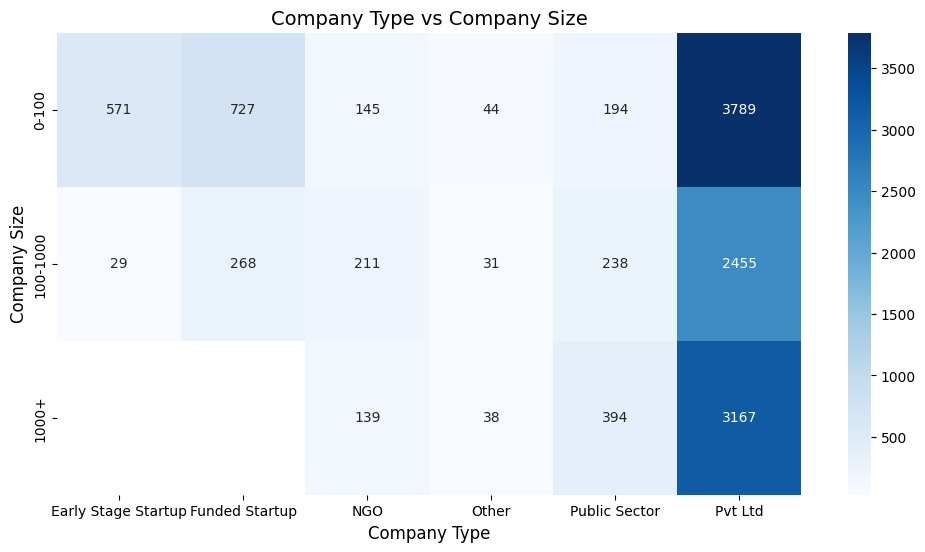

In [19]:

pivot_table = pd.pivot_table(df, index='company_size', columns='company_type', aggfunc=np.count_nonzero)['city']
fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(pivot_table, annot=True,cmap="Blues", ax=ax,fmt='g',)

ax.set_title('Company Type vs Company Size', fontsize=14)
ax.set_xlabel('Company Type', fontsize=12)
ax.set_ylabel('Company Size', fontsize=12)

plt.show()


Now, Early Stage and Funded  Startup can usually be classified 0-100.Rest of them is equally distributed

In [20]:
df.loc[df["company_type"] == "Early Stage Startup"][["company_size"]].isna().any()


company_size    True
dtype: bool

In [21]:
df.loc[df["company_type"] == "Funded Startup"][["company_type"]].isna().any()


company_type    False
dtype: bool

In [22]:

df[df["company_type"]=="Early Stage Startup"]["company_size"].value_counts()


company_size
0-100       571
100-1000     29
Name: count, dtype: int64

In [23]:
df[df["company_type"]=="Early Stage Startup"]["company_size"].isna().sum()

3

In [24]:
df.loc[df["company_type"] == "Early Stage Startup", "company_size"]=df.loc[df["company_type"] == "Early Stage Startup", "company_size"].fillna('0-100')

In [25]:
df[df["company_type"]=="Early Stage Startup"]["company_size"].isna().sum()

0

In [26]:
df.loc[df["company_type"] == "Funded Startup", "company_size"]=df.loc[df["company_type"] == "Funded Startup", "company_size"].fillna('0-100')

In [27]:
df.loc[df["company_type"] == "Funded Startup"][["company_type"]].isna().any()


company_type    False
dtype: bool

In [28]:
null_sorted(df)


gender:22.00%
major_discipline:9.13%
company_type:5.65%
company_size:4.12%
last_new_job:1.67%
education_level:1.32%
enrolled_university:1.22%
experience:0.33%


In [29]:
import missingno as msno



<Axes: >

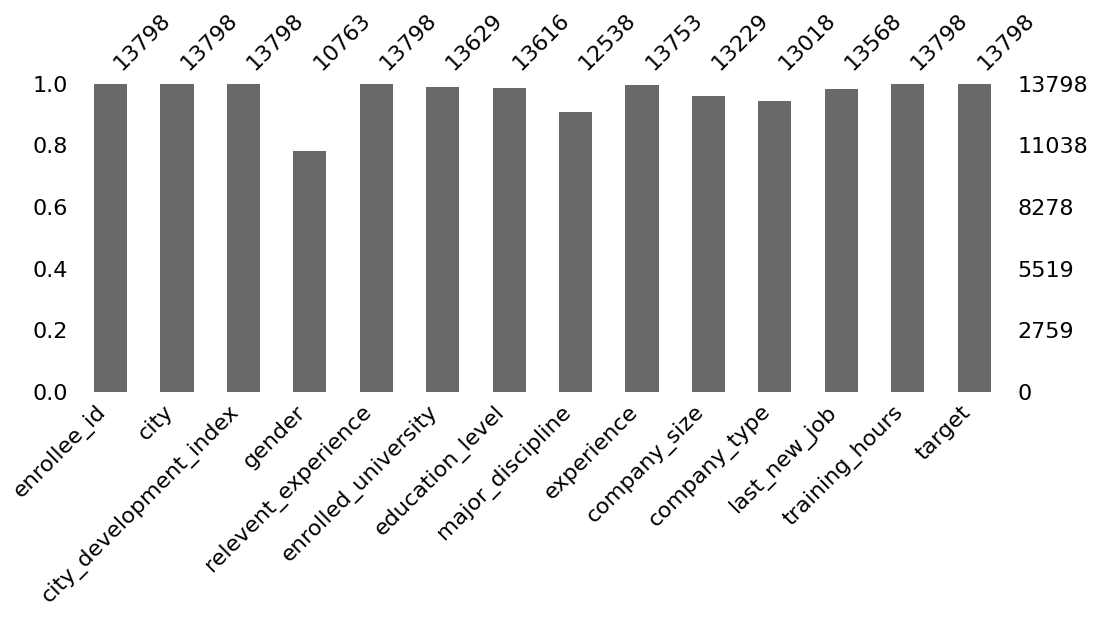

In [30]:
msno.bar(df,figsize=(12,4))

I will try to find links between columns to fill up null values.

In [31]:
df[["training_hours","experience"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13798 entries, 1 to 19156
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   training_hours  13798 non-null  int64 
 1   experience      13753 non-null  object
dtypes: int64(1), object(1)
memory usage: 323.4+ KB


In [32]:
df=df.dropna(axis=0,thresh=11)
null_sorted(df)


gender:21.76%
major_discipline:8.86%
company_type:5.50%
company_size:4.03%
last_new_job:1.51%
enrolled_university:1.10%
education_level:1.08%
experience:0.24%


In [33]:
df=df.dropna(axis=0,subset=["company_type","company_size"],thresh=2)
null_sorted(df)



gender:21.26%
major_discipline:7.90%
last_new_job:1.31%
education_level:1.00%
enrolled_university:0.96%
experience:0.19%


In [34]:
df[df["experience"].isna()==True]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
3760,21042,city_103,0.920,NaN,Has relevent experience,Full time course,Graduate,STEM,NaN,0-100,Funded Startup,>4,24,0.0
5043,18350,city_21,0.624,NaN,Has relevent experience,Full time course,Graduate,STEM,NaN,0-100,Pvt Ltd,1,20,1.0
5670,7907,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,NaN,0-100,Funded Startup,NaN,27,0.0
6334,8082,city_16,0.910,NaN,Has relevent experience,no_enrollment,Masters,Other,NaN,0-100,Pvt Ltd,2,40,0.0
7077,27758,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,NaN,0-100,Pvt Ltd,>4,19,0.0
7532,3113,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,1000+,Pvt Ltd,1,94,0.0
7608,2978,city_21,0.624,NaN,Has relevent experience,Full time course,Graduate,Other,NaN,1000+,Public Sector,NaN,91,0.0
7791,5876,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,NaN,100-1000,Pvt Ltd,NaN,256,0.0
8453,8470,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,NaN,100-1000,Pvt Ltd,NaN,11,0.0
9974,16308,city_21,0.624,Female,Has relevent experience,no_enrollment,Masters,STEM,NaN,1000+,Pvt Ltd,NaN,216,0.0


<Axes: ylabel='experience'>

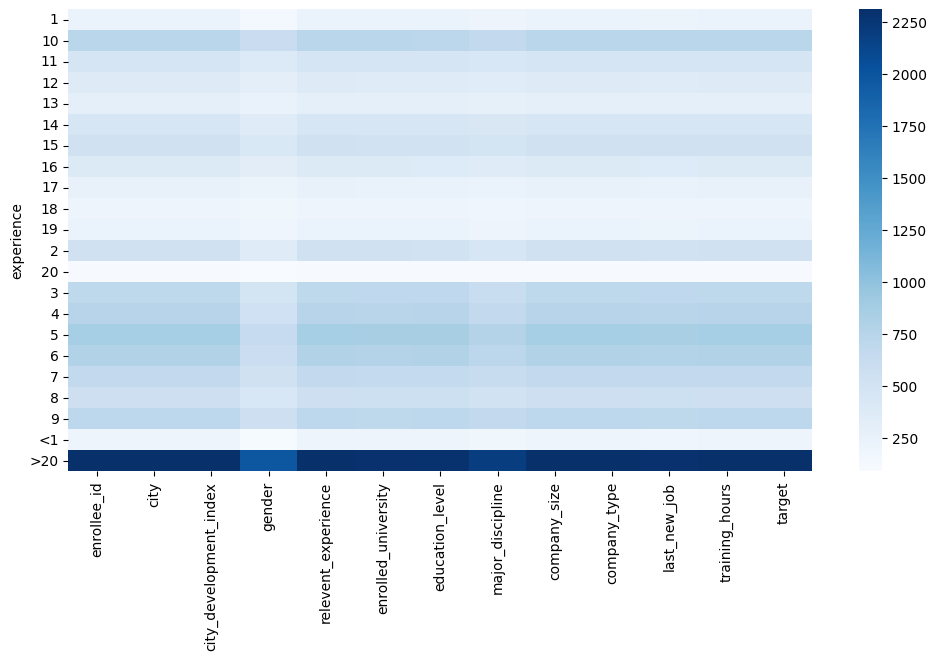

In [35]:
table=df.groupby(by="experience").count()
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(table,cmap="Blues")

In [36]:
df["experience"]=df["experience"].fillna("unknown")

In [37]:
null_sorted(df)


gender:21.26%
major_discipline:7.90%
last_new_job:1.31%
education_level:1.00%
enrolled_university:0.96%


<Axes: ylabel='enrolled_university'>

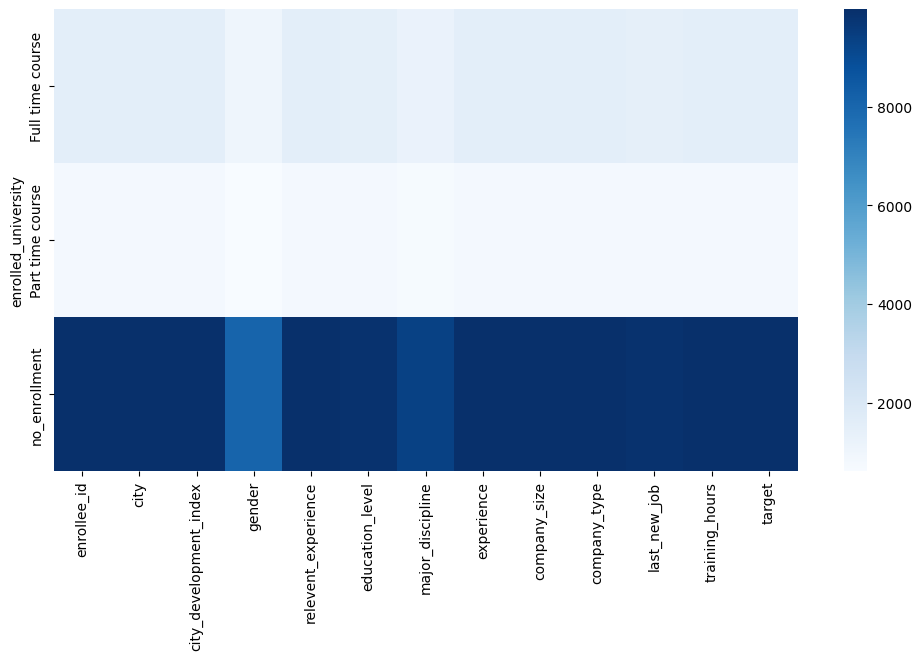

In [38]:
table2=df.groupby(by="enrolled_university").count()
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(table2,cmap="Blues")

In [39]:
df["enrolled_university"].value_counts()

enrolled_university
no_enrollment       9966
Full time course    1532
Part time course     820
Name: count, dtype: int64

In [40]:
table2

,enrollee_id,city,city_development_index,gender,relevent_experience,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrolled_university,,,,,,,,,,,,,
Full time course,1532,1532,1532,1026,1532,1503,1265,1532,1532,1532,1484,1532,1532
Part time course,820,820,820,618,820,809,705,820,820,820,806,820,820
no_enrollment,9966,9966,9966,8078,9966,9885,9374,9966,9966,9966,9868,9966,9966


In [41]:
df["enrolled_university"]=df["enrolled_university"].fillna("unknown")

In [42]:
null_sorted(df)


gender:21.26%
major_discipline:7.90%
last_new_job:1.31%
education_level:1.00%


In [43]:
df["education_level"].value_counts()

education_level
Graduate          7961
Masters           3189
High School        787
Phd                320
Primary School      57
Name: count, dtype: int64

In [44]:
df["education_level"].isnull().value_counts()

education_level
False    12314
True       124
Name: count, dtype: int64

In [45]:
df["last_new_job"].isnull().value_counts()

last_new_job
False    12275
True       163
Name: count, dtype: int64

In [46]:
df.loc[df[["last_new_job", "education_level"]].isna().all(axis=1)]


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
8910,12456,city_134,0.698,Male,No relevent experience,no_enrollment,NaN,NaN,<1,100-1000,Pvt Ltd,NaN,50,1.0


--There are probably multiple columns that have nan more than one column in a row. So if there are nan more than 3, including 3, in a row, I will drop it.

In [47]:
df=df.dropna(thresh=12)

In [48]:
null_sorted(df)

gender:20.88%
major_discipline:7.45%
last_new_job:1.20%
education_level:0.62%


In [49]:
df=df.dropna(subset=["education_level","last_new_job"])

In [50]:
null_sorted(df)

gender:20.25%
major_discipline:6.95%


I will fill na values of major_discipline

In [51]:
df[["major_discipline"]].value_counts()

major_discipline
STEM                10117
Humanities            448
Other                 231
Business Degree       212
Arts                  163
No Major              137
Name: count, dtype: int64

There are two nan columns, so ı will use machine learning to fill na values

In [52]:
df["gender"].value_counts()

gender
Male      8764
Female     830
Other       97
Name: count, dtype: int64

## Machine Learning for Missing Values

In [54]:
ml=df

In [55]:
def columnvalue(df):
    columns=[]
    numbers=[]
    
    for column in df.columns:
        column_counts = len(df[column].value_counts())
        numbers.append(column_counts)
        columns.append(column)
    zipped=zip(columns,numbers)
    for item in zipped:
        print(item)
    
    
    
    

In [56]:
columnvalue(ml)

('enrollee_id', 12152)
('city', 119)
('city_development_index', 92)
('gender', 3)
('relevent_experience', 2)
('enrolled_university', 4)
('education_level', 5)
('major_discipline', 6)
('experience', 23)
('company_size', 3)
('company_type', 6)
('last_new_job', 6)
('training_hours', 241)
('target', 2)


I will reshape experience column

In [57]:
ml["experience"]=ml["experience"].replace({'<1': 1,'>20':20,'1':1,'20':20,'unknown':-1})
ml["experience"].value_counts()


experience
20    2373
5      840
6      779
4      734
10     718
9      700
3      680
7      658
8      557
15     521
2      506
11     475
14     455
1      411
16     381
12     365
13     303
17     250
19     225
18     204
-1      17
Name: count, dtype: int64

In [58]:
ml["experience"]=ml["experience"].astype(int)

In [59]:
ml["experience"]=pd.qcut(ml['experience'],5)
ml["experience"]

1         (12.0, 19.0]
4         (19.0, 20.0]
6        (-1.001, 5.0]
7         (12.0, 19.0]
8           (5.0, 8.0]
             ...      
19149      (8.0, 12.0]
19150      (8.0, 12.0]
19152       (5.0, 8.0]
19155     (19.0, 20.0]
19156    (-1.001, 5.0]
Name: experience, Length: 12152, dtype: category
Categories (5, interval[float64, right]): [(-1.001, 5.0] < (5.0, 8.0] < (8.0, 12.0] < (12.0, 19.0] < (19.0, 20.0]]

In [60]:
columnvalue(ml)

('enrollee_id', 12152)
('city', 119)
('city_development_index', 92)
('gender', 3)
('relevent_experience', 2)
('enrolled_university', 4)
('education_level', 5)
('major_discipline', 6)
('experience', 5)
('company_size', 3)
('company_type', 6)
('last_new_job', 6)
('training_hours', 241)
('target', 2)


In [61]:
ml=pd.get_dummies(ml,columns=["relevent_experience","enrolled_university","education_level","experience","company_size","company_type","last_new_job"])


In [62]:
ml.dropna(subset="gender",how="all",inplace=True)

In [63]:
ml["gender"]

1          Male
4          Male
6          Male
7          Male
8          Male
          ...  
19149      Male
19150    Female
19152    Female
19155      Male
19156      Male
Name: gender, Length: 9691, dtype: object

In [64]:
X = ml.drop(columns=['gender','city','city_development_index',"enrollee_id","major_discipline","target"],axis=1)

In [65]:
y=ml["gender"]

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=101)

In [68]:
scaler = StandardScaler()

In [69]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [71]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",class_weight="balanced")

In [72]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

In [73]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [74]:
grid_model.fit(scaled_X_train,y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\P

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          multi_class='ovr', solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [75]:
grid_model.best_params_

{'C': 464.15888336127773, 'penalty': 'l2'}

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [77]:
y_pred = grid_model.predict(scaled_X_test)

In [78]:
accuracy_score(y_test,y_pred)

0.4109353507565337

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Female       0.12      0.43      0.19       250
        Male       0.93      0.41      0.57      2633
       Other       0.01      0.40      0.02        25

    accuracy                           0.41      2908
   macro avg       0.35      0.41      0.26      2908
weighted avg       0.85      0.41      0.53      2908



There are imbalanced data, so accuracy is low. This is why I will not countinue to fill it. Hence, I will drop the column

In [80]:
df=df.drop(columns="gender")

In [81]:
null_sorted(df)


major_discipline:6.95%


In [83]:
df["major_discipline"].value_counts()

major_discipline
STEM               10117
Humanities           448
Other                231
Business Degree      212
Arts                 163
No Major             137
Name: count, dtype: int64

In [86]:
df["major_discipline"].fillna("Unknown",inplace=True)

In [87]:
null_sorted(df)


EDA

In [88]:
df.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,STEM,"(12.0, 19.0]",0-100,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,STEM,"(19.0, 20.0]",0-100,Funded Startup,4,8,0.0
6,28806,city_160,0.920,Has relevent experience,no_enrollment,High School,Unknown,"(-1.001, 5.0]",0-100,Funded Startup,1,24,0.0
7,402,city_46,0.762,Has relevent experience,no_enrollment,Graduate,STEM,"(12.0, 19.0]",0-100,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,"(5.0, 8.0]",0-100,Pvt Ltd,1,46,1.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12152 entries, 1 to 19156
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             12152 non-null  int64   
 1   city                    12152 non-null  object  
 2   city_development_index  12152 non-null  float64 
 3   relevent_experience     12152 non-null  object  
 4   enrolled_university     12152 non-null  object  
 5   education_level         12152 non-null  object  
 6   major_discipline        12152 non-null  object  
 7   experience              12152 non-null  category
 8   company_size            12152 non-null  object  
 9   company_type            12152 non-null  object  
 10  last_new_job            12152 non-null  object  
 11  training_hours          12152 non-null  int64   
 12  target                  12152 non-null  float64 
dtypes: category(1), float64(2), int64(2), object(8)
memory usage: 1.2+ MB
